In [1]:
import os
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from sklearn.model_selection import train_test_split
from keras import regularizers


from keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay
from keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.utils import load_img

from tqdm.notebook import tqdm
from keras.models import Model
from sklearn.utils.class_weight import compute_class_weight
from PIL import Image



from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

2024-04-27 13:22:35.565535: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-27 13:22:35.565671: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-27 13:22:35.718772: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# Gender Classification Convolutional Neural Network

## Overview
We will build two neural networks to classify age, gender.

### Gender Classification
The first neural network will classify gender into the following bins:

- <span style="color:blue">Male</span>
- <span style="color:red">Female</span>




# Data Import

## Dataset Selection
We will use the augmented open-source dataset called <span style="color:blue">"UTKFace"</span>. This dataset comprises over <span style="color:green">200,000 images</span> of individuals ranging from <span style="color:orange">1 to 100 years</span> of age.


### File Information Extraction
To kickstart our data visualization process, we'll import the filenames into a dataframe. Extracting the details encapsulated within the filenames, including <span style="color:blue">filename</span> and <span style="color:green">gender</span>.

In [2]:
BASE_DIR_train_male ="/kaggle/input/gender-recognition-200k-images-celeba/Dataset/Train/Male"
BASE_DIR_train_female ="/kaggle/input/gender-recognition-200k-images-celeba/Dataset/Train/Female"

BASE_DIR_val_male ="/kaggle/input/gender-recognition-200k-images-celeba/Dataset/Validation/Male"
BASE_DIR_val_female ="/kaggle/input/gender-recognition-200k-images-celeba/Dataset/Validation/Female"

BASE_DIR_test_male ="/kaggle/input/gender-recognition-200k-images-celeba/Dataset/Test/Male"
BASE_DIR_test_female ="/kaggle/input/gender-recognition-200k-images-celeba/Dataset/Test/Female"

In [3]:
gender_classes=["Male", "Female"]



In [4]:
image_paths_train = []
gender_labels_train = []

for filename in tqdm(os.listdir(BASE_DIR_train_male)):
    image_path = os.path.join(BASE_DIR_train_male, filename)
    image_paths_train.append(image_path)
    gender_labels_train.append("Male")


  0%|          | 0/67155 [00:00<?, ?it/s]

In [5]:


for filename in tqdm(os.listdir(BASE_DIR_train_female)):
    image_path = os.path.join(BASE_DIR_train_female, filename)
    image_paths_train.append(image_path)
    gender_labels_train.append("Female")


  0%|          | 0/92845 [00:00<?, ?it/s]

In [6]:

for filename in tqdm(os.listdir(BASE_DIR_val_male)):
    image_path = os.path.join(BASE_DIR_val_male, filename)
    image_paths_train.append(image_path)
    gender_labels_train.append("Male")


  0%|          | 0/8820 [00:00<?, ?it/s]

In [7]:


for filename in tqdm(os.listdir(BASE_DIR_val_female)):
    image_path = os.path.join(BASE_DIR_val_female, filename)
    image_paths_train.append(image_path)
    gender_labels_train.append("Female")


  0%|          | 0/13778 [00:00<?, ?it/s]

In [8]:
image_paths_test = []
gender_labels_test = []

for filename in tqdm(os.listdir(BASE_DIR_test_male)):
    image_path = os.path.join(BASE_DIR_test_male, filename)
    image_paths_test.append(image_path)
    gender_labels_test.append("Male")


  0%|          | 0/8459 [00:00<?, ?it/s]

In [9]:


for filename in tqdm(os.listdir(BASE_DIR_test_female)):
    image_path = os.path.join(BASE_DIR_test_female, filename)
    image_paths_test.append(image_path)
    gender_labels_test.append("Female")


  0%|          | 0/11542 [00:00<?, ?it/s]

In [10]:
df_gender_train = pd.DataFrame()
df_gender_train['image'], df_gender_train['gender'] = image_paths_train, gender_labels_train
df_gender_train.head()

,image,gender
0,/kaggle/input/gender-recognition-200k-images-c...,Male
1,/kaggle/input/gender-recognition-200k-images-c...,Male
2,/kaggle/input/gender-recognition-200k-images-c...,Male
3,/kaggle/input/gender-recognition-200k-images-c...,Male
4,/kaggle/input/gender-recognition-200k-images-c...,Male


In [11]:
df_gender_test = pd.DataFrame()
df_gender_test['image'], df_gender_test['gender'] = image_paths_test, gender_labels_test
df_gender_test.head()

,image,gender
0,/kaggle/input/gender-recognition-200k-images-c...,Male
1,/kaggle/input/gender-recognition-200k-images-c...,Male
2,/kaggle/input/gender-recognition-200k-images-c...,Male
3,/kaggle/input/gender-recognition-200k-images-c...,Male
4,/kaggle/input/gender-recognition-200k-images-c...,Male


In [12]:
df_gender_test=df_gender_test.sample(frac=1)

In [13]:
df_gender_train=df_gender_train.sample(frac=1)

In [14]:
df_gender_train.head()

,image,gender
36779,/kaggle/input/gender-recognition-200k-images-c...,Male
51619,/kaggle/input/gender-recognition-200k-images-c...,Male
32733,/kaggle/input/gender-recognition-200k-images-c...,Male
53263,/kaggle/input/gender-recognition-200k-images-c...,Male
67669,/kaggle/input/gender-recognition-200k-images-c...,Female



# Gender Classification
We will transform the gender column from <span style="color:red">Classes</span>  into <span style="color:blue">Binary</span> for better classification.

## Data Validation

### Results
The results were successful. We managed to import our data and store it into our variables.
riables.


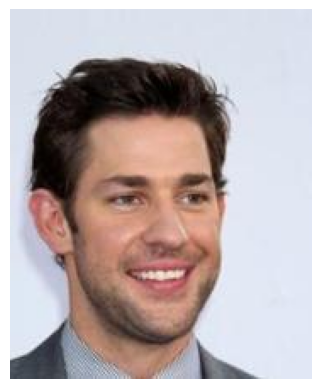

In [15]:
img = Image.open(df_gender_train['image'][0])
plt.axis('off')
plt.imshow(img);

In [16]:
img=cv2.imread(df_gender_train['image'][288])
img.shape

(218, 178, 3)

In [17]:
def gender_bin(gender):

    if gender=='Male':
        return 0
    else:
        return 1

In [18]:
df_gender_train['gender_bin']=df_gender_train['gender'].apply(gender_bin)
df_gender_test['gender_bin']=df_gender_test['gender'].apply(gender_bin)

In [19]:
df_gender_train

,image,gender,gender_bin
36779,/kaggle/input/gender-recognition-200k-images-c...,Male,0
51619,/kaggle/input/gender-recognition-200k-images-c...,Male,0
32733,/kaggle/input/gender-recognition-200k-images-c...,Male,0
53263,/kaggle/input/gender-recognition-200k-images-c...,Male,0
67669,/kaggle/input/gender-recognition-200k-images-c...,Female,1
...,...,...,...
44983,/kaggle/input/gender-recognition-200k-images-c...,Male,0
6094,/kaggle/input/gender-recognition-200k-images-c...,Male,0
7446,/kaggle/input/gender-recognition-200k-images-c...,Male,0
58208,/kaggle/input/gender-recognition-200k-images-c...,Male,0


In [20]:
df_gender_test

,image,gender,gender_bin
9520,/kaggle/input/gender-recognition-200k-images-c...,Female,1
19374,/kaggle/input/gender-recognition-200k-images-c...,Female,1
330,/kaggle/input/gender-recognition-200k-images-c...,Male,0
10486,/kaggle/input/gender-recognition-200k-images-c...,Female,1
7337,/kaggle/input/gender-recognition-200k-images-c...,Male,0
...,...,...,...
18412,/kaggle/input/gender-recognition-200k-images-c...,Female,1
19769,/kaggle/input/gender-recognition-200k-images-c...,Female,1
11953,/kaggle/input/gender-recognition-200k-images-c...,Female,1
12572,/kaggle/input/gender-recognition-200k-images-c...,Female,1


# Data Visualization





## Gender Distribution

### Training Dataset
- **Female**: <span style="color:blue">106,623</span> instances
- **Male**: <span style="color:red">75,975</span> instances

### Test Dataset
- **Female**: <span style="color:blue">11,542</span> instances
- **Male**: <span style="color:red">8,459</span> instances

### Histogram
The training dataset showcases a notable gender distribution, with a higher representation of females compared to males. This pattern is also reflected in the test dataset, albeit with smaller counts. The discrepancy in gender representation between training and test datasets may influence model performance and generalization, necessitating careful consideration during model development and evaluation.


In [21]:
df_gender_train['gender'].value_counts()

gender
Female    106623
Male       75975
Name: count, dtype: int64

In [22]:
df_gender_test['gender'].value_counts()

gender
Female    11542
Male       8459
Name: count, dtype: int64

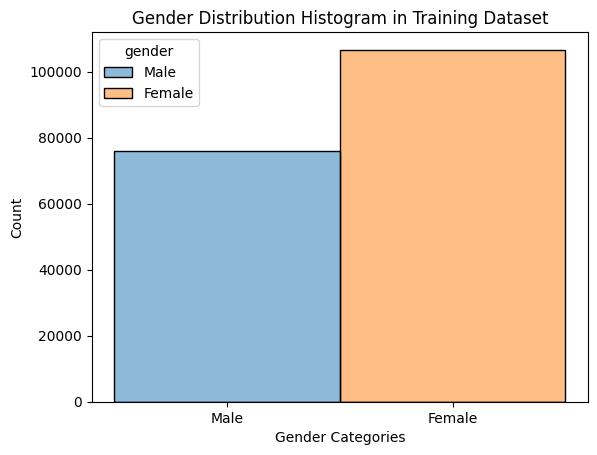

(None,)

In [23]:
import warnings
warnings.filterwarnings("ignore")

sns.histplot(x=df_gender_train['gender'], hue='gender', data=df_gender_train)
plt.title('Gender Distribution Histogram in Training Dataset')
plt.xlabel('Gender Categories')
plt.show(),

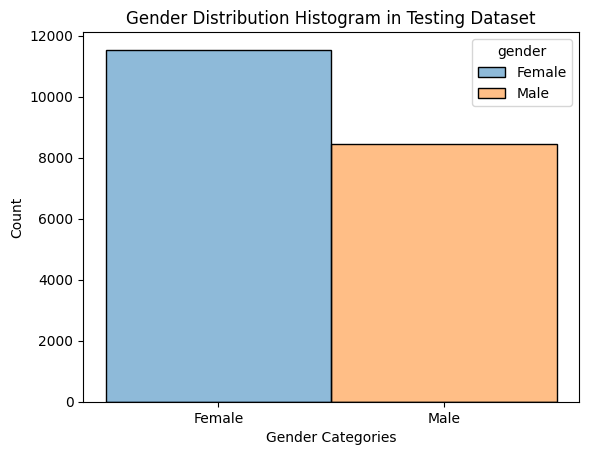

(None,)

In [24]:


sns.histplot(x=df_gender_test['gender'], hue='gender', data=df_gender_test)
plt.title('Gender Distribution Histogram in Testing Dataset')
plt.xlabel('Gender Categories')
plt.show(),

## Data Preparation and Dataframe Creation

### Loading and Preprocessing
- **train_image_list**: <span style="color:blue">Training</span> image file paths.
- **train_labels_list**: <span style="color:blue">Training</span> gender labels.
- **test_image_list**: <span style="color:orange">Test</span> image file paths.
- **test_labels_list**: <span style="color:orange">Test</span> gender labels.
- **train_image_list_tf**: <span style="color:blue">Training</span> image file paths (TensorFlow constant).
- **train_labels_list_tf**: <span style="color:blue">Training</span> gender labels (TensorFlow constant).
- **test_image_list_tf**: <span style="color:orange">Test</span> image file paths (TensorFlow constant).
- **test_labels_list_tf**: <span style="color:orange">Test</span> gender labels (TensorFlow constant).
- **num_classes**: <span style="color:green">Number</span> of gender categories (2).

### Parsing Function
- **_parse_function(filename, label)**: Parses images and labels.
    - Reads image files.
    - Decodes JPEG images.
    - Converts labels to one-hot encoded vectors.


In [ ]:
train_image_list = list(df_gender_train['image'])
train_labels_list = list(df_gender_train['gender_bin'])

test_image_list = list(df_gender_test['image'])
test_labels_list = list(df_gender_test['gender_bin'])

In [ ]:
train_image_list_tf = tf.constant(train_image_list)
train_labels_list_tf = tf.constant(train_labels_list)

test_image_list_tf = tf.constant(test_image_list)
test_labels_list_tf = tf.constant(test_labels_list)

In [ ]:
num_classes = 2
def _parse_function(filename, label):
    image_string = tf.io.read_file(filename)
    image_decoded = tf.io.decode_jpeg(image_string, channels=3)  
    
    image_resized = tf.image.resize(image_decoded, [218, 178])
    
    image_normalized = image_resized / 255.0

    
    label = tf.one_hot(label, num_classes)

    return image_normalized, label

In [ ]:

train_image_dataset = tf.data.Dataset.from_tensor_slices((train_image_list_tf, train_labels_list_tf))
train_image_dataset = train_image_dataset.map(_parse_function)
train_image_dataset = train_image_dataset.batch(128) 


test_image_dataset = tf.data.Dataset.from_tensor_slices((test_image_list_tf, test_labels_list_tf))
test_image_dataset = test_image_dataset.map(_parse_function)
test_image_dataset = test_image_dataset.batch(128) 

In [ ]:
train_image_dataset

# Gender Classification Model

## Model Architecture

The gender classification model is a Convolutional Neural Network (CNN) with several convolutional layers followed by max-pooling layers for feature extraction. Batch normalization is applied after each convolutional layer for normalization and faster training. Dropout regularization is also used to prevent overfitting.

After the convolutional layers, a Global Average Pooling layer is added to reduce the spatial dimensions of the feature maps. Two dense layers with ReLU activation functions are then applied for further feature processing.

The output layer employs a <span style="color:orange">sigmoid activation function</span> to predict the probability distribution across the gender categories.

Model Summary:
- Input Shape: (Image Height, Image Width, 3)
- Convolutional Layers: <span style="color:blue">64, 128, 256, and 512 filters</span> with a kernel size of (3, 3)
- Max Pooling Layers: Applied after each convolutional layer
- Dropout Layer: Applied with a dropout rate of <span style="color:green">0.3</span> after the last convolutional layer
- Global Average Pooling Layer
- Dense Layers: <span style="color:blue">256 and 128 units</span> with ReLU activation function
- Batch Normalization: Applied after dense layers
- Output Layer: Dense layer with <span style="color:blue">7 units</span> and softmax activation function for gender classification

The model architecture effectively extracts features from input images and classifies them into different gender categories.


## Compilation
The model is compiled using the <span style="color:blue">Adam</span> with a learning rate of <span style="color:green">0.001</span>. <span style="color:orange">Categorical cross-entropy loss</span> is utilized as the loss function, which is suitable for multi-class classification tasks.

## Model Training
Training is conducted using a batch size of <span style="color:green">128</span> over <span style="color:green">5</span> epochs. <span style="color:orange">Early stopping</span> with a patience of <span style="color:green">5</span> is employed to prevent overfitting, and the best model weights are restored. The training and validation data are evaluated for accuracy metrics.

## Results

The training process for the gender classification model spanned 5 epochs, revealing notable observations:

- **Initial Epoch:**
  - The model commenced with a promising accuracy of <span style="color:orange">89.53%</span> and a relatively low loss of <span style="color:orange">0.2344</span>.

- **Progressive Improvement:**
  - Subsequent epochs showcased consistent enhancements in both accuracy and loss metrics.

- **Final Epoch:**
  - The model achieved a commendable accuracy of <span style="color:green">98.09%</span> with a diminished loss of <span style="color:green">0.0513</span>.

- **Validation Performance:**
  - The validation metrics also portrayed favorable results, with an accuracy of <span style="color:green">92.44%</span> and a loss of <span style="color:green">0.2088</span>.

These findings suggest that the model effectively learned from the training data, demonstrating improved accuracy and reduced loss over the training epochs. Furthermore, the model exhibited reasonable generalization capabilities, as evidenced by its performance on the validation dataset.



In [ ]:



model = tf.keras.models.Sequential()


model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(218, 178,3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(512, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))


model.add(layers.GlobalAveragePooling2D())

model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())


model.add(layers.Dense(2, activation='sigmoid'))  


model.summary()

In [ ]:


early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 5, mode = 'min', restore_best_weights = True)


callbacks_list=[early_stopping_callback]

model.compile(optimizer="adam", loss=['binary_crossentropy'], metrics=['binary_accuracy'])


                

In [ ]:

history=model.fit(
    train_image_dataset,
    batch_size=128,    
    epochs=5,
    callbacks=callbacks_list,
    validation_data=test_image_dataset,
    verbose=2,
    shuffle=False


)


# Results Visualization

In [ ]:
y_predict = model.predict(test_image_dataset)


In [ ]:
model.evaluate(test_image_dataset)

In [ ]:
def argmax_fun(array):
    array_1=[]
    for i in array:
        if i == array.max():
            i=1
        else:
            i=0
        array_1.append(i)
    return array_1

In [ ]:
y_predict_argmax= y_predict.copy()
for i in range(len(y_predict)):
    y_predict_argmax[i]= argmax_fun(y_predict[i])

In [ ]:
y_predict_argmax

In [ ]:
y_pred_list=[]
for i in y_predict_argmax:
    y_pred_list.append(i.argmax())

## Interpretation of Confusion Matrix

The confusion matrix provides insights into the model's performance in classifying gender categories. Here's an interpretation of the results:

- **<span style="color:green">High Correct Classifications (True Positives)</span>**: The diagonal elements of the matrix indicate the number of instances correctly classified for each gender category. For instance, there were <span style="color:green">8,267</span> instances correctly classified as belonging to the male category.

- **<span style="color:red">Misclassifications (False Positives)</span>**: Off-diagonal elements represent instances that were incorrectly classified as belonging to a different gender category. For example, there were <span style="color:red">192</span> instances classified as male where they are females.




In [ ]:
cm_age = tf.math.confusion_matrix(labels=test_labels_list, predictions=y_pred_list, num_classes=2)
conf_matrix_result = cm_age.numpy()
cm_age= sns.heatmap(cm_age, annot=True, fmt=".1f")
tick_positions = np.arange(2) + 0.5
cm_age.set_yticks(tick_positions, gender_classes)

cm_age.set_xticks(tick_positions, gender_classes)



In [ ]:
conf_matrix_result


### Interpretation of Training and Validation Metrics

#### Loss Plot:
- The training loss initially starts at a relatively low value of <span style="color:green">0.2344</span> and gradually decreases over epochs.
- Validation loss also decreases over epochs, starting from <span style="color:green">0.2088</span> and converging to a slightly higher value of <span style="color:green">0.1082</span>.
- Both training and validation loss converge to stable values, indicating effective learning and generalization.

#### Accuracy Plot:
- The training accuracy starts at <span style="color:orange">89.53 %</span> and steadily increases over epochs.
- Validation accuracy starts at <span style="color:orange">92.44 %</span> and fluctuates slightly but remains relatively high, reaching <span style="color:green">96.25%</span>.
- Both training and validation accuracies converge to stable values, demonstrating the model's ability to accurately classify gender categories.

These trends suggest that the model effectively learns from the training data and generalizes well to unseen validation data, resulting in improved accuracy and reduced loss over the training epochs.


In [ ]:
epochs = range(len(history.history["loss"]))
plt.plot(epochs, history.history["loss"], 'blue', label = "loss")
plt.plot(epochs, history.history["val_loss"], 'red', label ="val_loss")
plt.title("Total Loss and Total Validation Loss")
plt.legend()

In [ ]:
epochs = range(len(history.history["loss"]))
plt.plot(epochs, history.history["binary_accuracy"], 'blue', label = "accuracy")
plt.plot(epochs, history.history["val_binary_accuracy"], 'red', label ="val_accuracy")
plt.title("Total Accuracy and Total Validation Accuracy")
plt.legend()

In [ ]:
model.save('gender_model.h5')
